In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("WildBlueberryPollinationSimulationData.csv")
data

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [3]:
data.shape

(777, 18)

In [4]:
data.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [5]:
data.tail()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735
776,776,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,24.00,0.39,0.384646,0.392303,29.742583,3943.131681


In [6]:
data.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

## Handling categorical values
#### as there is no Categorical Values i.e object datatype , we can skip the handling Categorical Values 

## Handling null values

In [8]:
data.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

## veiwing imbalanced data

#### using boxpot

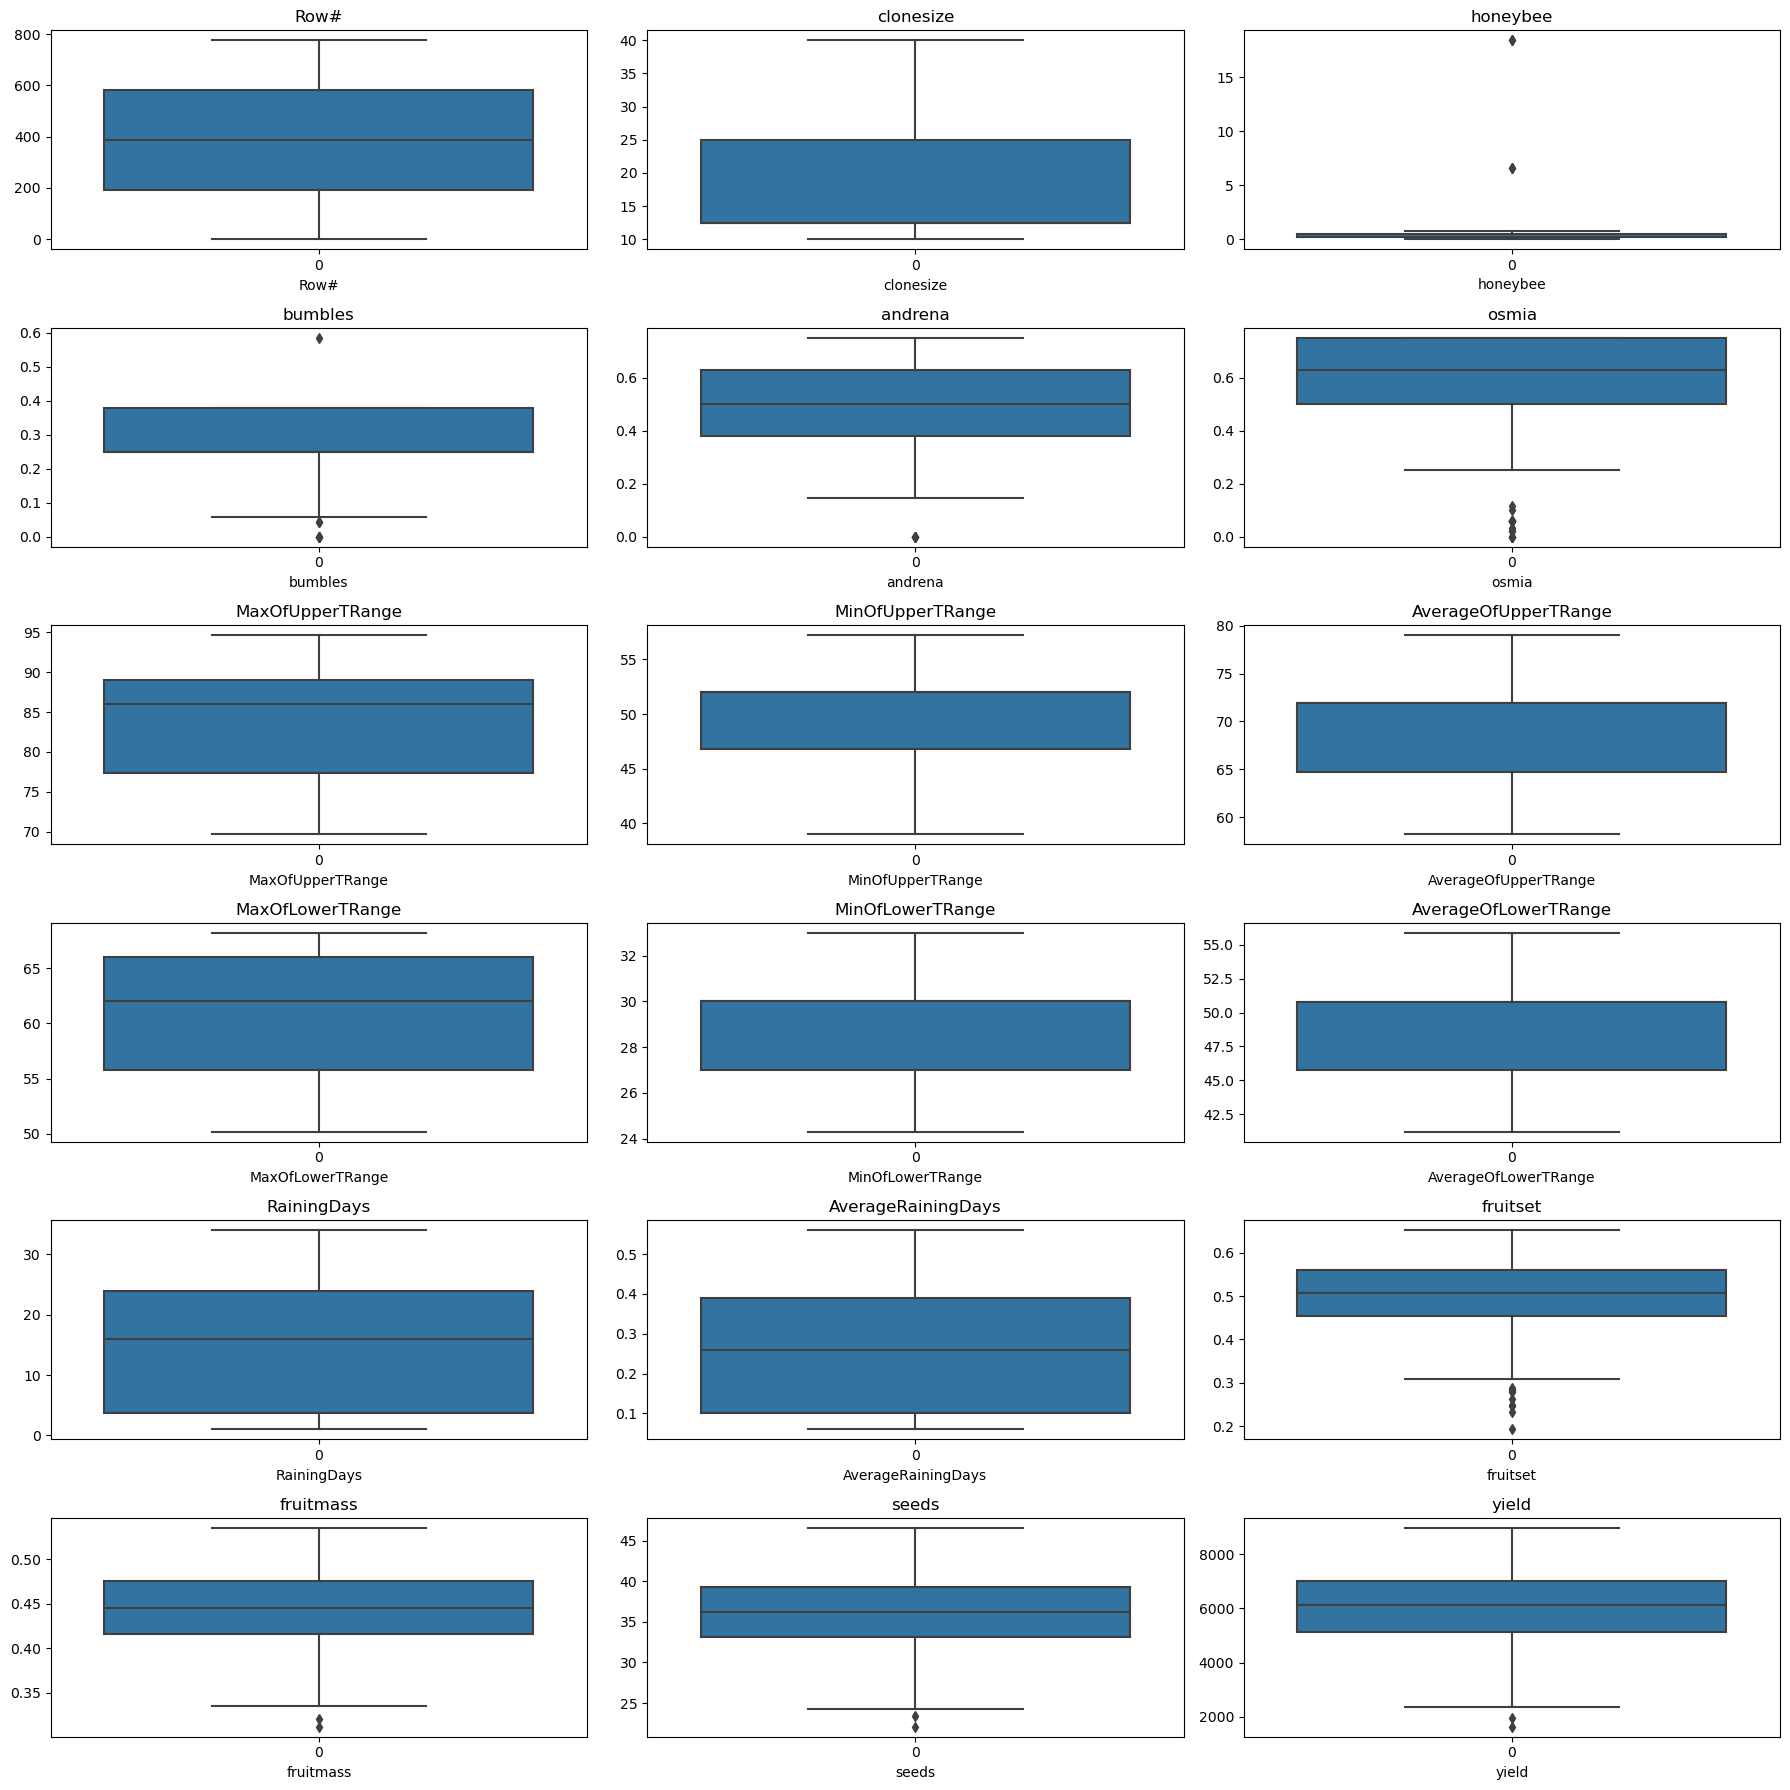

In [9]:
plt.figure(figsize=(18,18))
for i,col in enumerate (data.columns):
    plt.subplot(6,3,i+1)
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.title(col)
plt.tight_layout()
    

#### using histplot


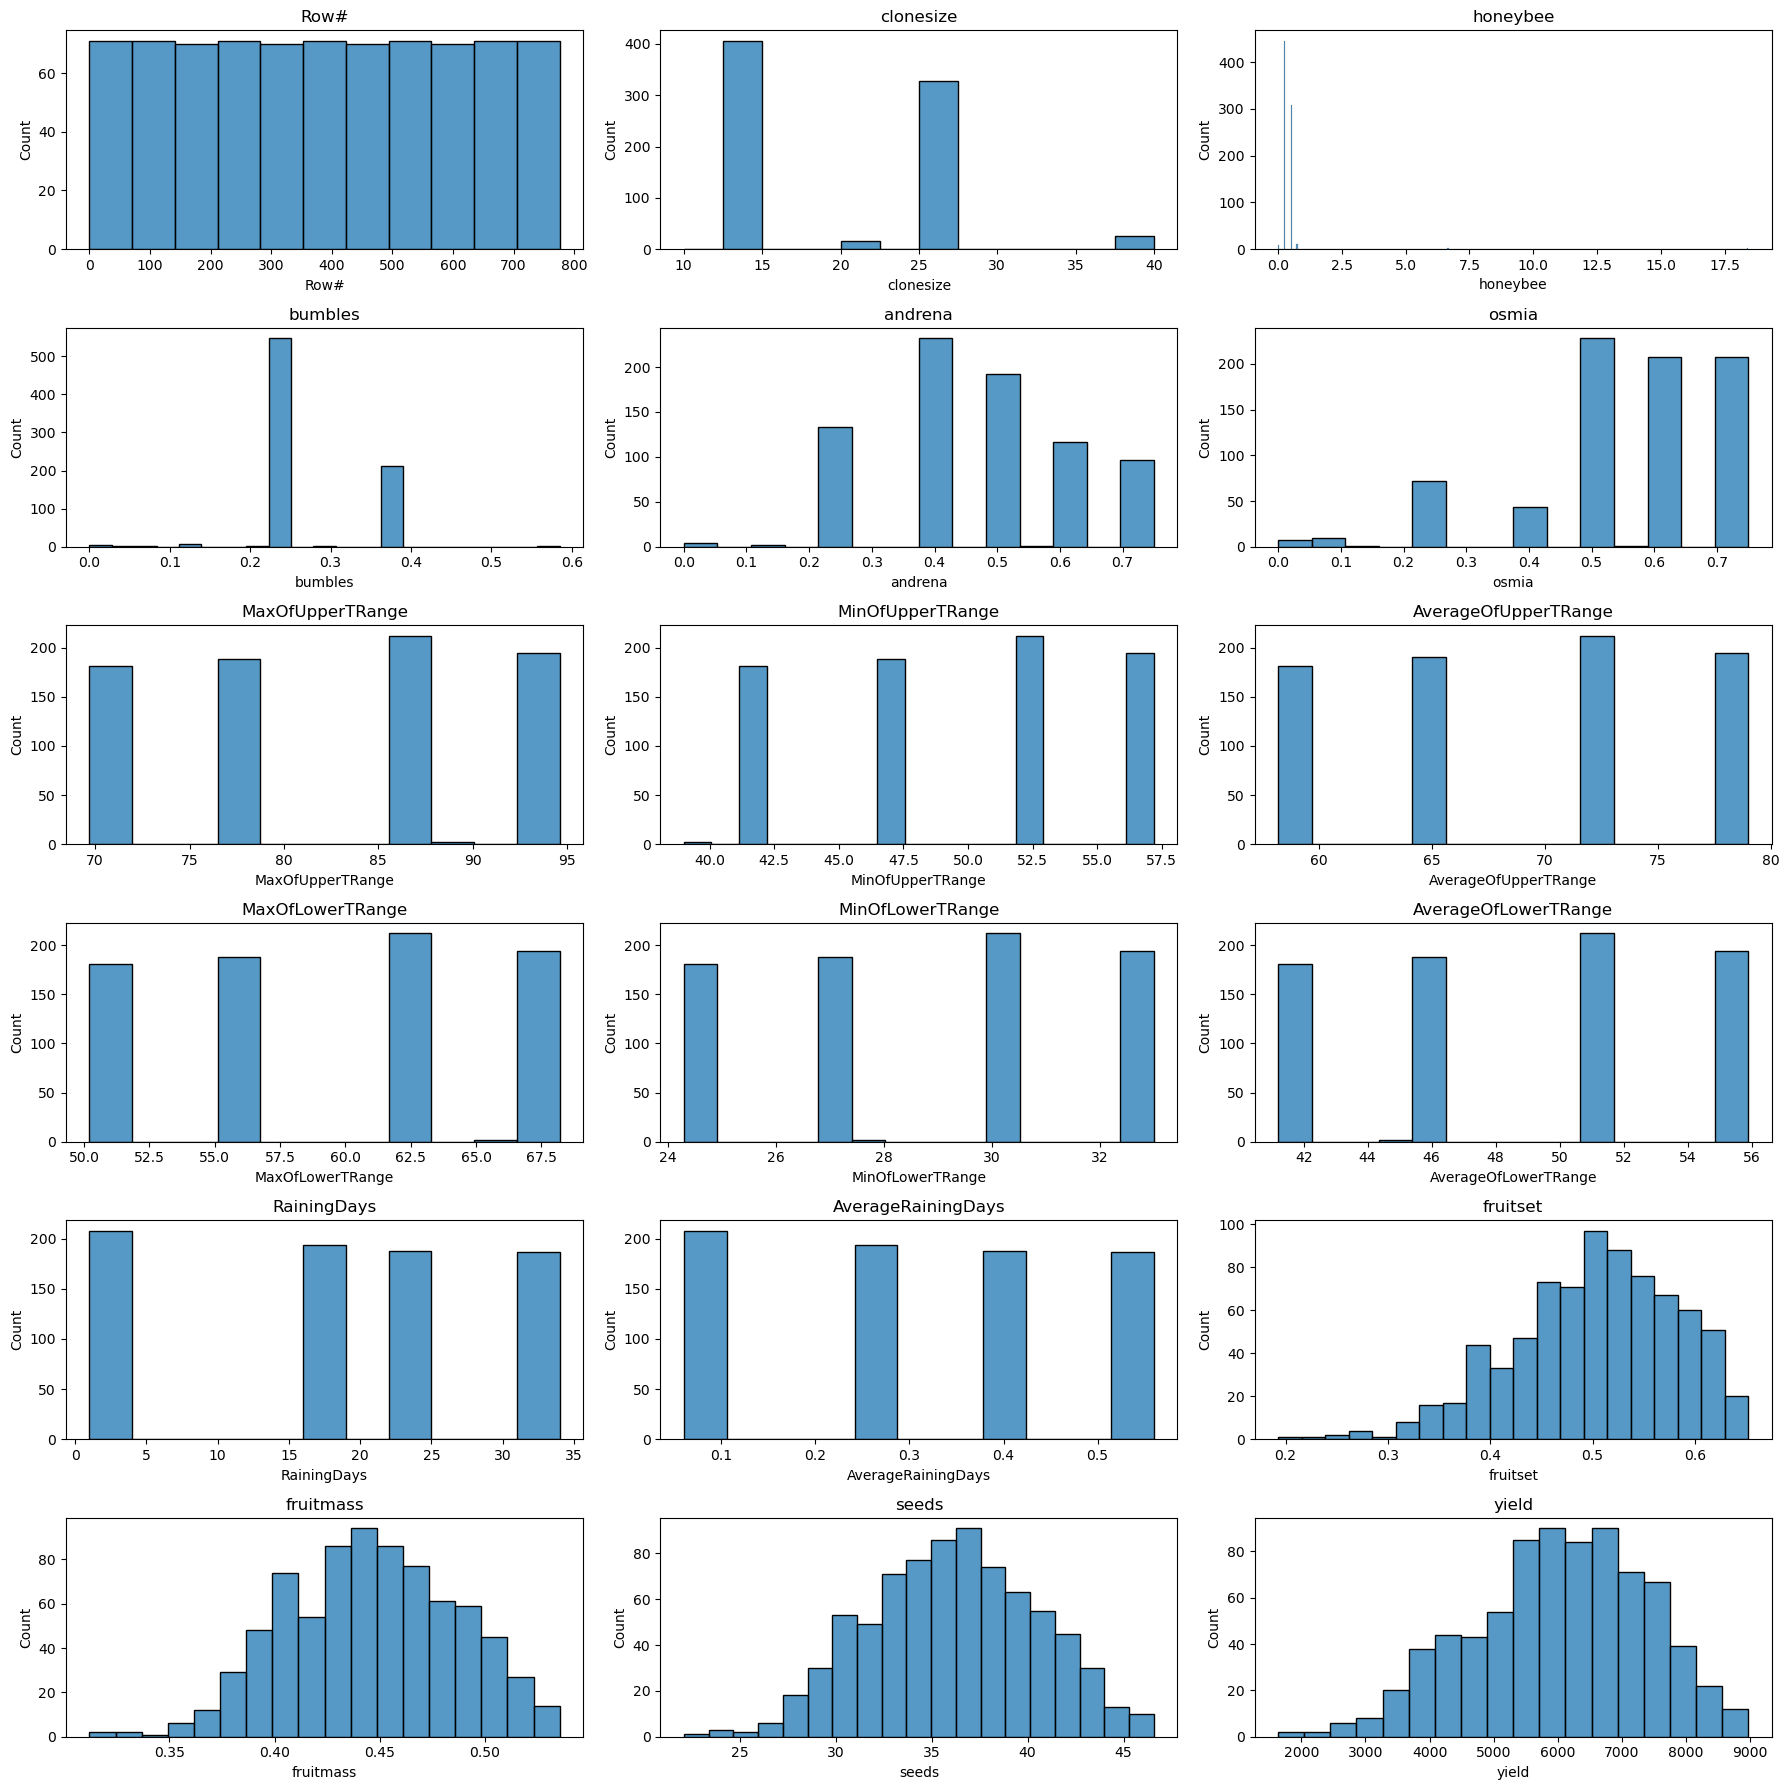

In [10]:
plt.figure(figsize=(18,18))
for i,col in enumerate(data.columns):
    plt.subplot(6,3,i+1)
    sns.histplot(data[col])
    plt.xlabel(col)
    plt.title(col)
plt.tight_layout()

## handling imbalance data
#### by removing outliers

In [4]:
x=data
q1=x.quantile(0.25)
q3=x.quantile(0.75)
iqr=q3-q1
iqr

Row#                     388.000000
clonesize                 12.500000
honeybee                   0.250000
bumbles                    0.130000
andrena                    0.250000
osmia                      0.250000
MaxOfUpperTRange          11.600000
MinOfUpperTRange           5.200000
AverageOfUpperTRange       7.200000
MaxOfLowerTRange          10.200000
MinOfLowerTRange           3.000000
AverageOfLowerTRange       5.000000
RainingDays               20.230000
AverageRainingDays         0.290000
fruitset                   0.106571
fruitmass                  0.059869
seeds                      6.123577
yield                   1897.334830
dtype: float64

In [5]:
p_d=data[~((data<(q1-1.5*iqr)) | (data>(q3+1.5*iqr))).any(axis=1)]
p_d.shape

(752, 18)

### vewing data after removing outliers


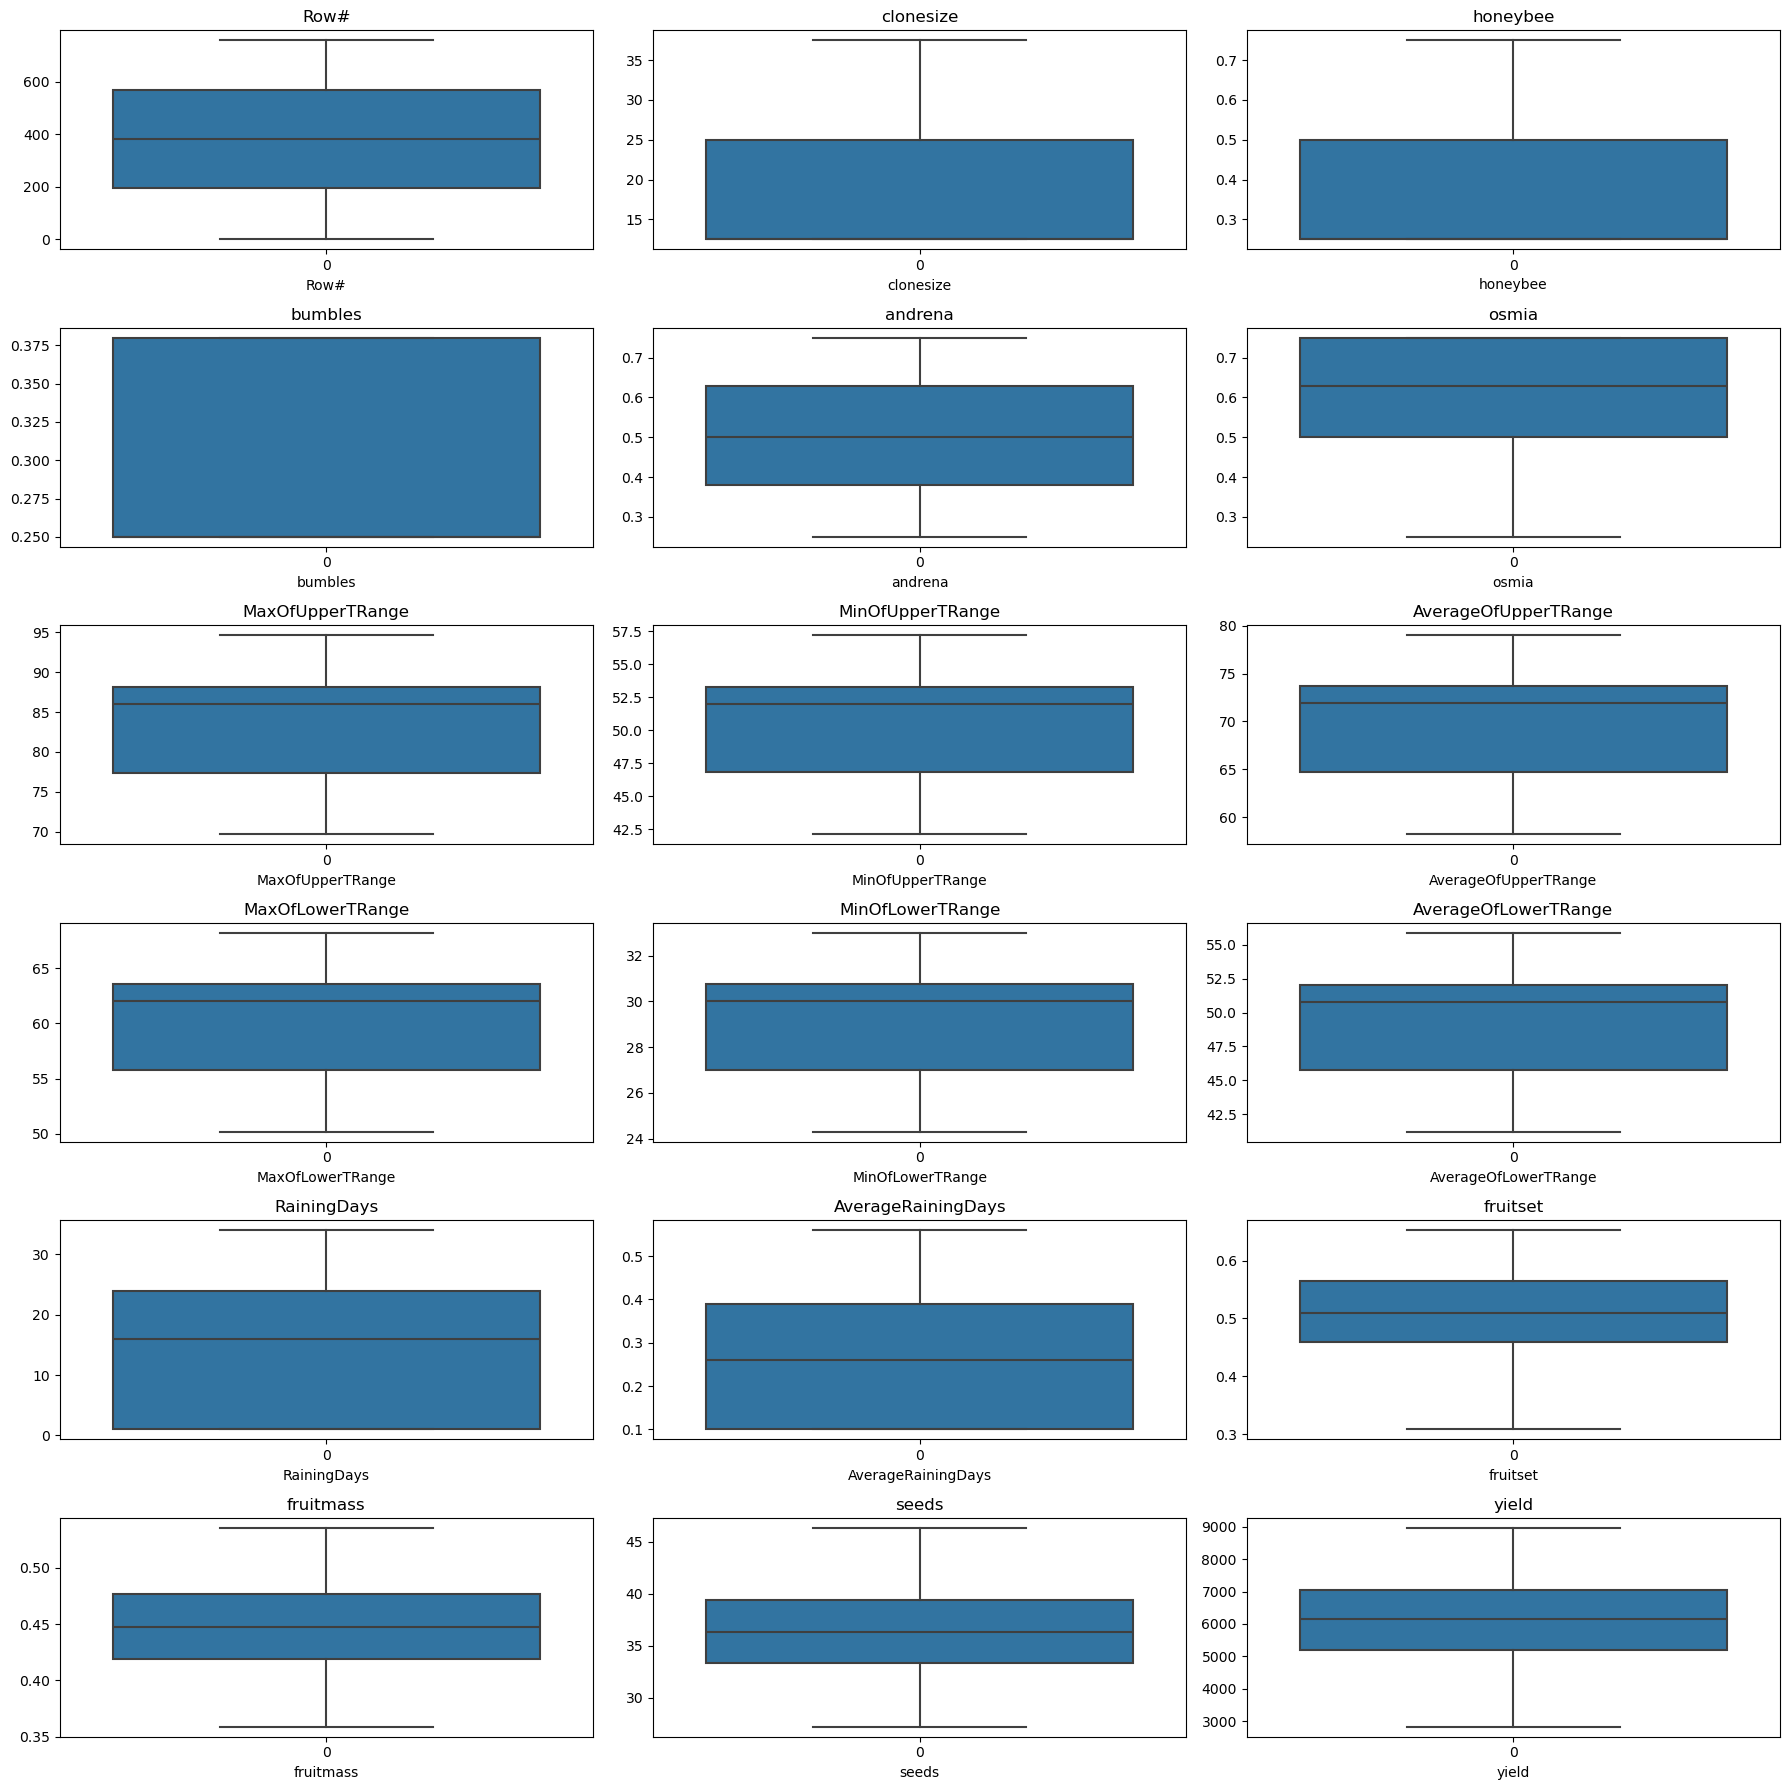

In [13]:
plt.figure(figsize=(18,18))
for i,col in enumerate(data.columns):
    plt.subplot(6,3,i + 1)
    sns.boxplot(p_d[col])
    plt.xlabel(col)
    plt.title(col)
plt.tight_layout()

## Descriptive statistical

In [14]:
p_d.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,382.337766,18.583777,0.356383,0.286649,0.475000,0.576463,82.076729,49.617154,68.577527,59.159840,28.628059,48.514362,18.484043,0.323564,0.506071,0.448129,36.359835,6079.902114
std,217.501250,6.885425,0.129602,0.058530,0.156807,0.149782,9.254791,5.610176,7.731659,6.687814,3.232915,5.454360,12.064176,0.168673,0.074723,0.038301,4.149800,1297.671790
min,0.000000,12.500000,0.250000,0.250000,0.250000,0.250000,69.700000,42.100000,58.200000,50.200000,24.300000,41.200000,1.000000,0.100000,0.308856,0.358821,27.190651,2825.003738
25%,194.750000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,1.000000,0.100000,0.458961,0.418833,33.312121,5203.052234
50%,382.500000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.509858,0.447567,36.310639,6153.369070
75%,570.250000,25.000000,0.500000,0.380000,0.630000,0.750000,88.150000,53.300000,73.675000,63.550000,30.750000,52.075000,24.000000,0.390000,0.564822,0.476859,39.368775,7052.695481
max,758.000000,37.500000,0.750000,0.380000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.369344,8969.401842


## Visual analysis

### Univariate analysis (histplot)

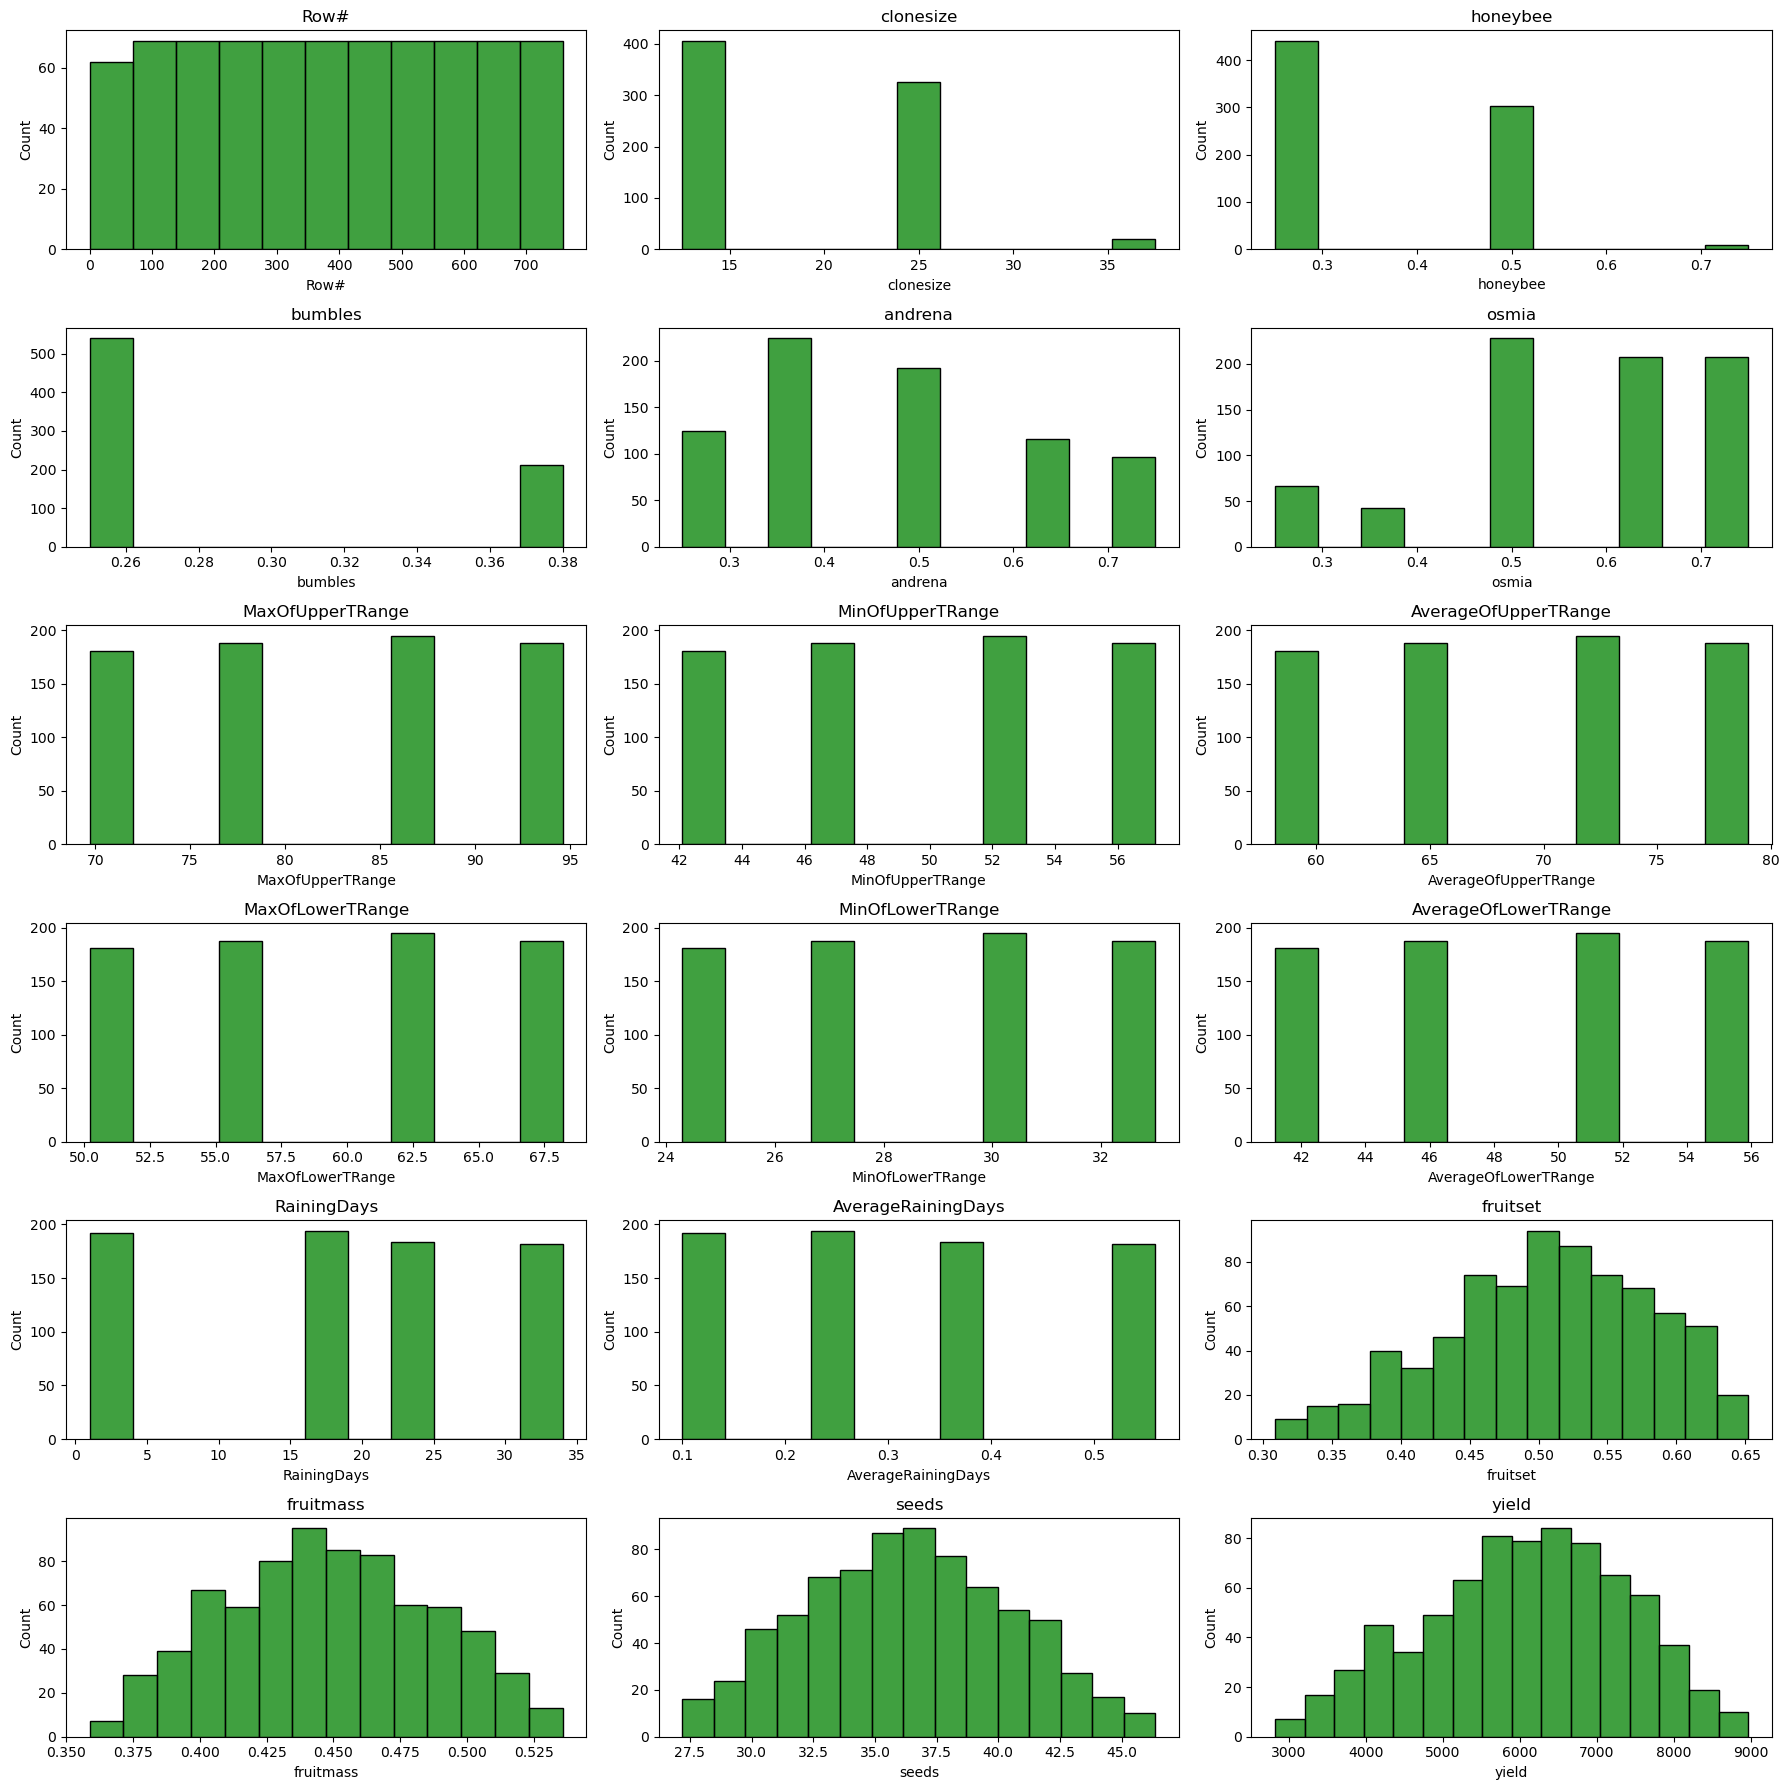

In [7]:
plt.figure(figsize=(18,18))
for i,col in enumerate(data.columns):
    plt.subplot(6,3,i+1)
    sns.histplot(p_d[col],color='green')
    plt.xlabel(col)
    plt.title(col)
plt.tight_layout()


#### stirplot

<Axes: ylabel='yield'>

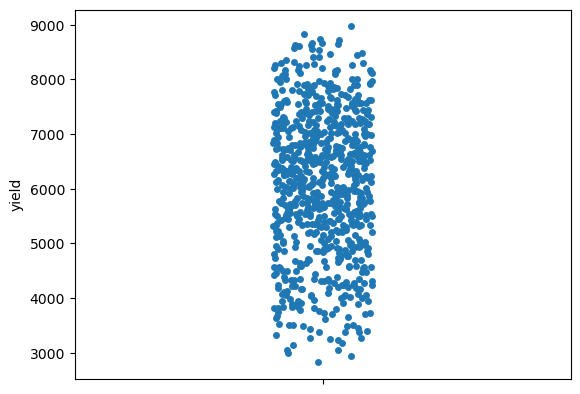

In [16]:
sns.stripplot(y=p_d['yield'])

### Bivariate analysis (scatter plot) 

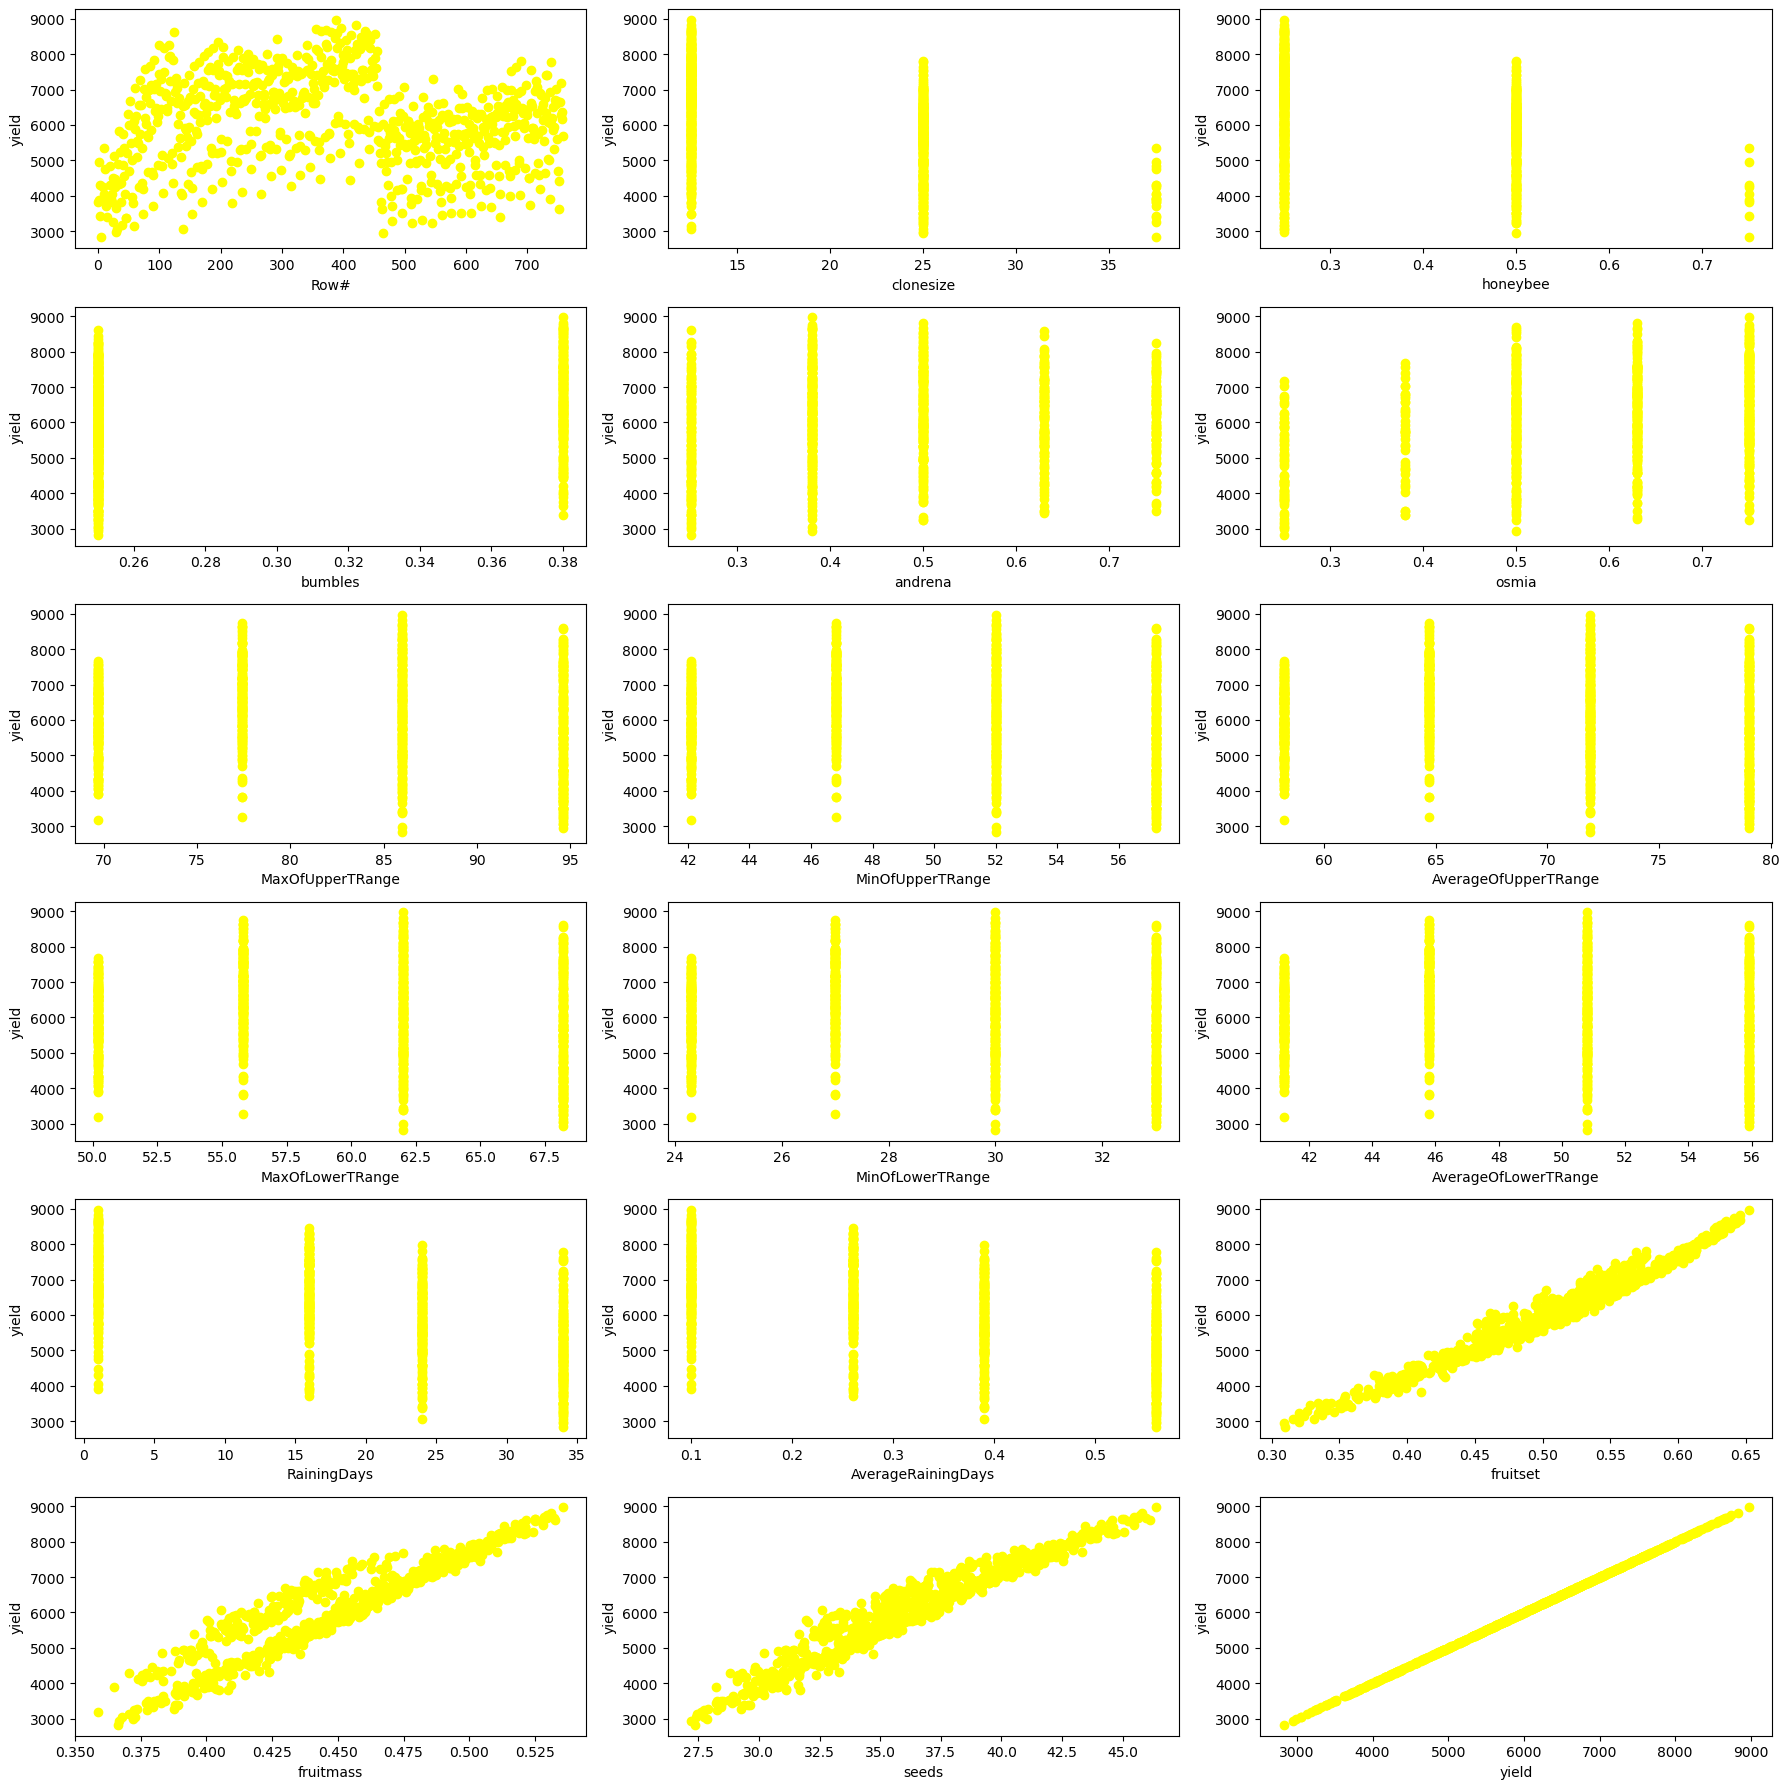

In [17]:
plt.figure(figsize=(18,18))
for i,col in enumerate(data.columns):
    plt.subplot(6,3,i+1)
    plt.scatter(x=p_d[col],y=p_d['yield'],color='yellow')
    plt.xlabel(col)
    plt.ylabel('yield')
plt.tight_layout()    

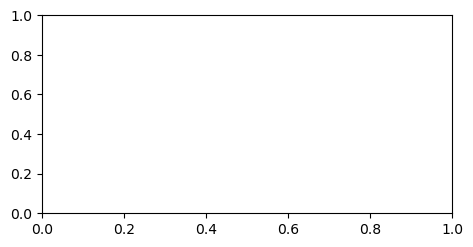

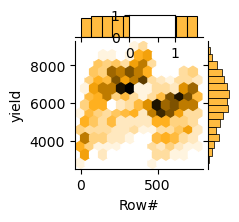

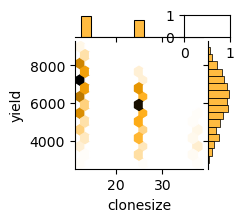

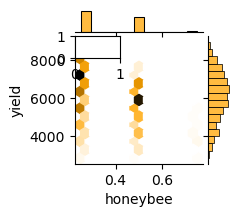

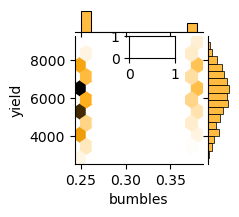

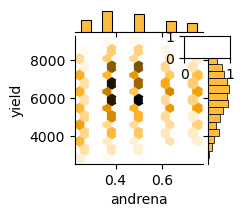

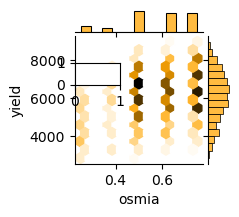

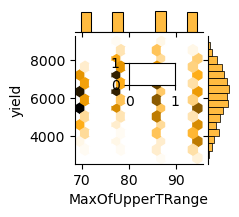

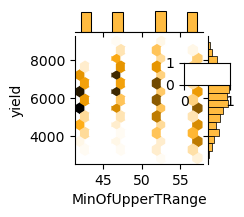

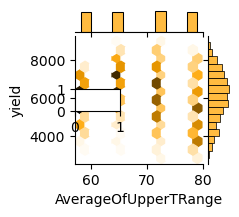

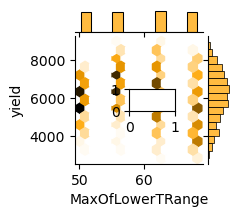

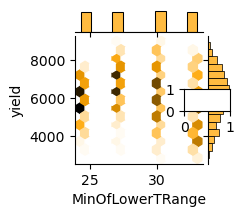

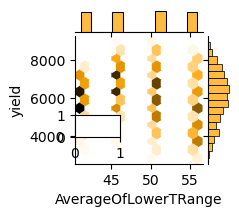

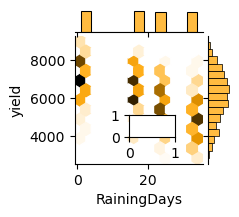

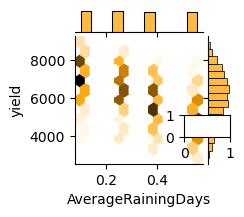

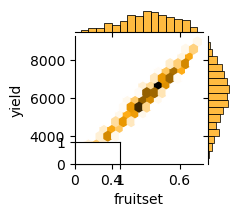

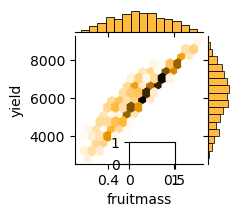

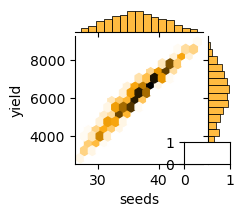

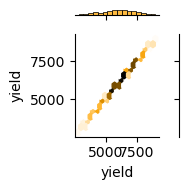

In [18]:
plt.figure(figsize=(18,18))
for i,col in enumerate(data.columns):
    plt.subplot(6,3,i+1)
    sns.jointplot(x=p_d[col],y=p_d['yield'],color='orange',kind='hex',height=2)
    plt.xlabel(col)
    plt.ylabel('yield')
plt.tight_layout()    

## Multivariate analysis (heat map)

                          Row#  clonesize  honeybee   bumbles   andrena  \
Row#                  1.000000   0.498998  0.722742  0.512499  0.514508   
clonesize             0.498998   1.000000  0.849859  0.036613  0.026053   
honeybee              0.722742   0.849859  1.000000  0.112885  0.197218   
bumbles               0.512499   0.036613  0.112885  1.000000 -0.068276   
andrena               0.514508   0.026053  0.197218 -0.068276  1.000000   
osmia                 0.454920  -0.100149  0.128819  0.160133  0.353502   
MaxOfUpperTRange     -0.019350   0.008441  0.004620  0.010844 -0.000509   
MinOfUpperTRange     -0.019381   0.008498  0.004629  0.010840 -0.000537   
AverageOfUpperTRange -0.019465   0.008575  0.004648  0.010850 -0.000577   
MaxOfLowerTRange     -0.019379   0.008494  0.004628  0.010841 -0.000535   
MinOfLowerTRange     -0.019367   0.008472  0.004625  0.010842 -0.000524   
AverageOfLowerTRange -0.019314   0.008484  0.004617  0.010820 -0.000526   
RainingDays           0.0

<Figure size 1500x1500 with 0 Axes>

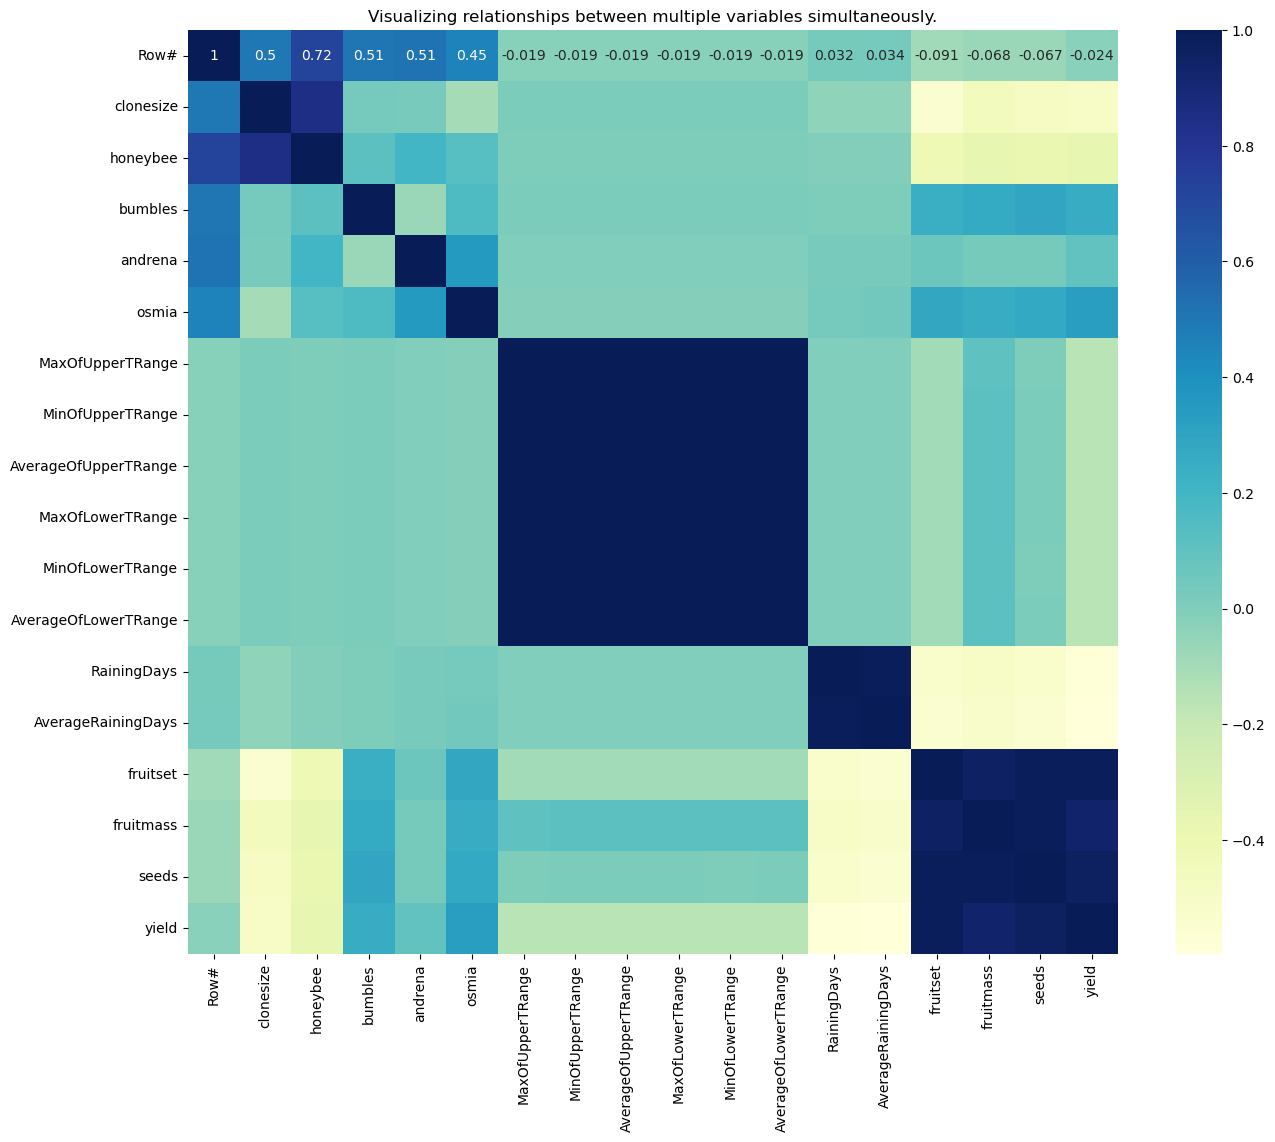

In [19]:
plt.figure(figsize=(15,15))
c=p_d.corr()
print(c)
plt.figure(figsize=(15,12))
sns.heatmap(c,annot=True,cmap="YlGnBu")
plt.title('Visualizing relationships between multiple variables simultaneously.')
plt.show()

<Figure size 1500x1200 with 0 Axes>

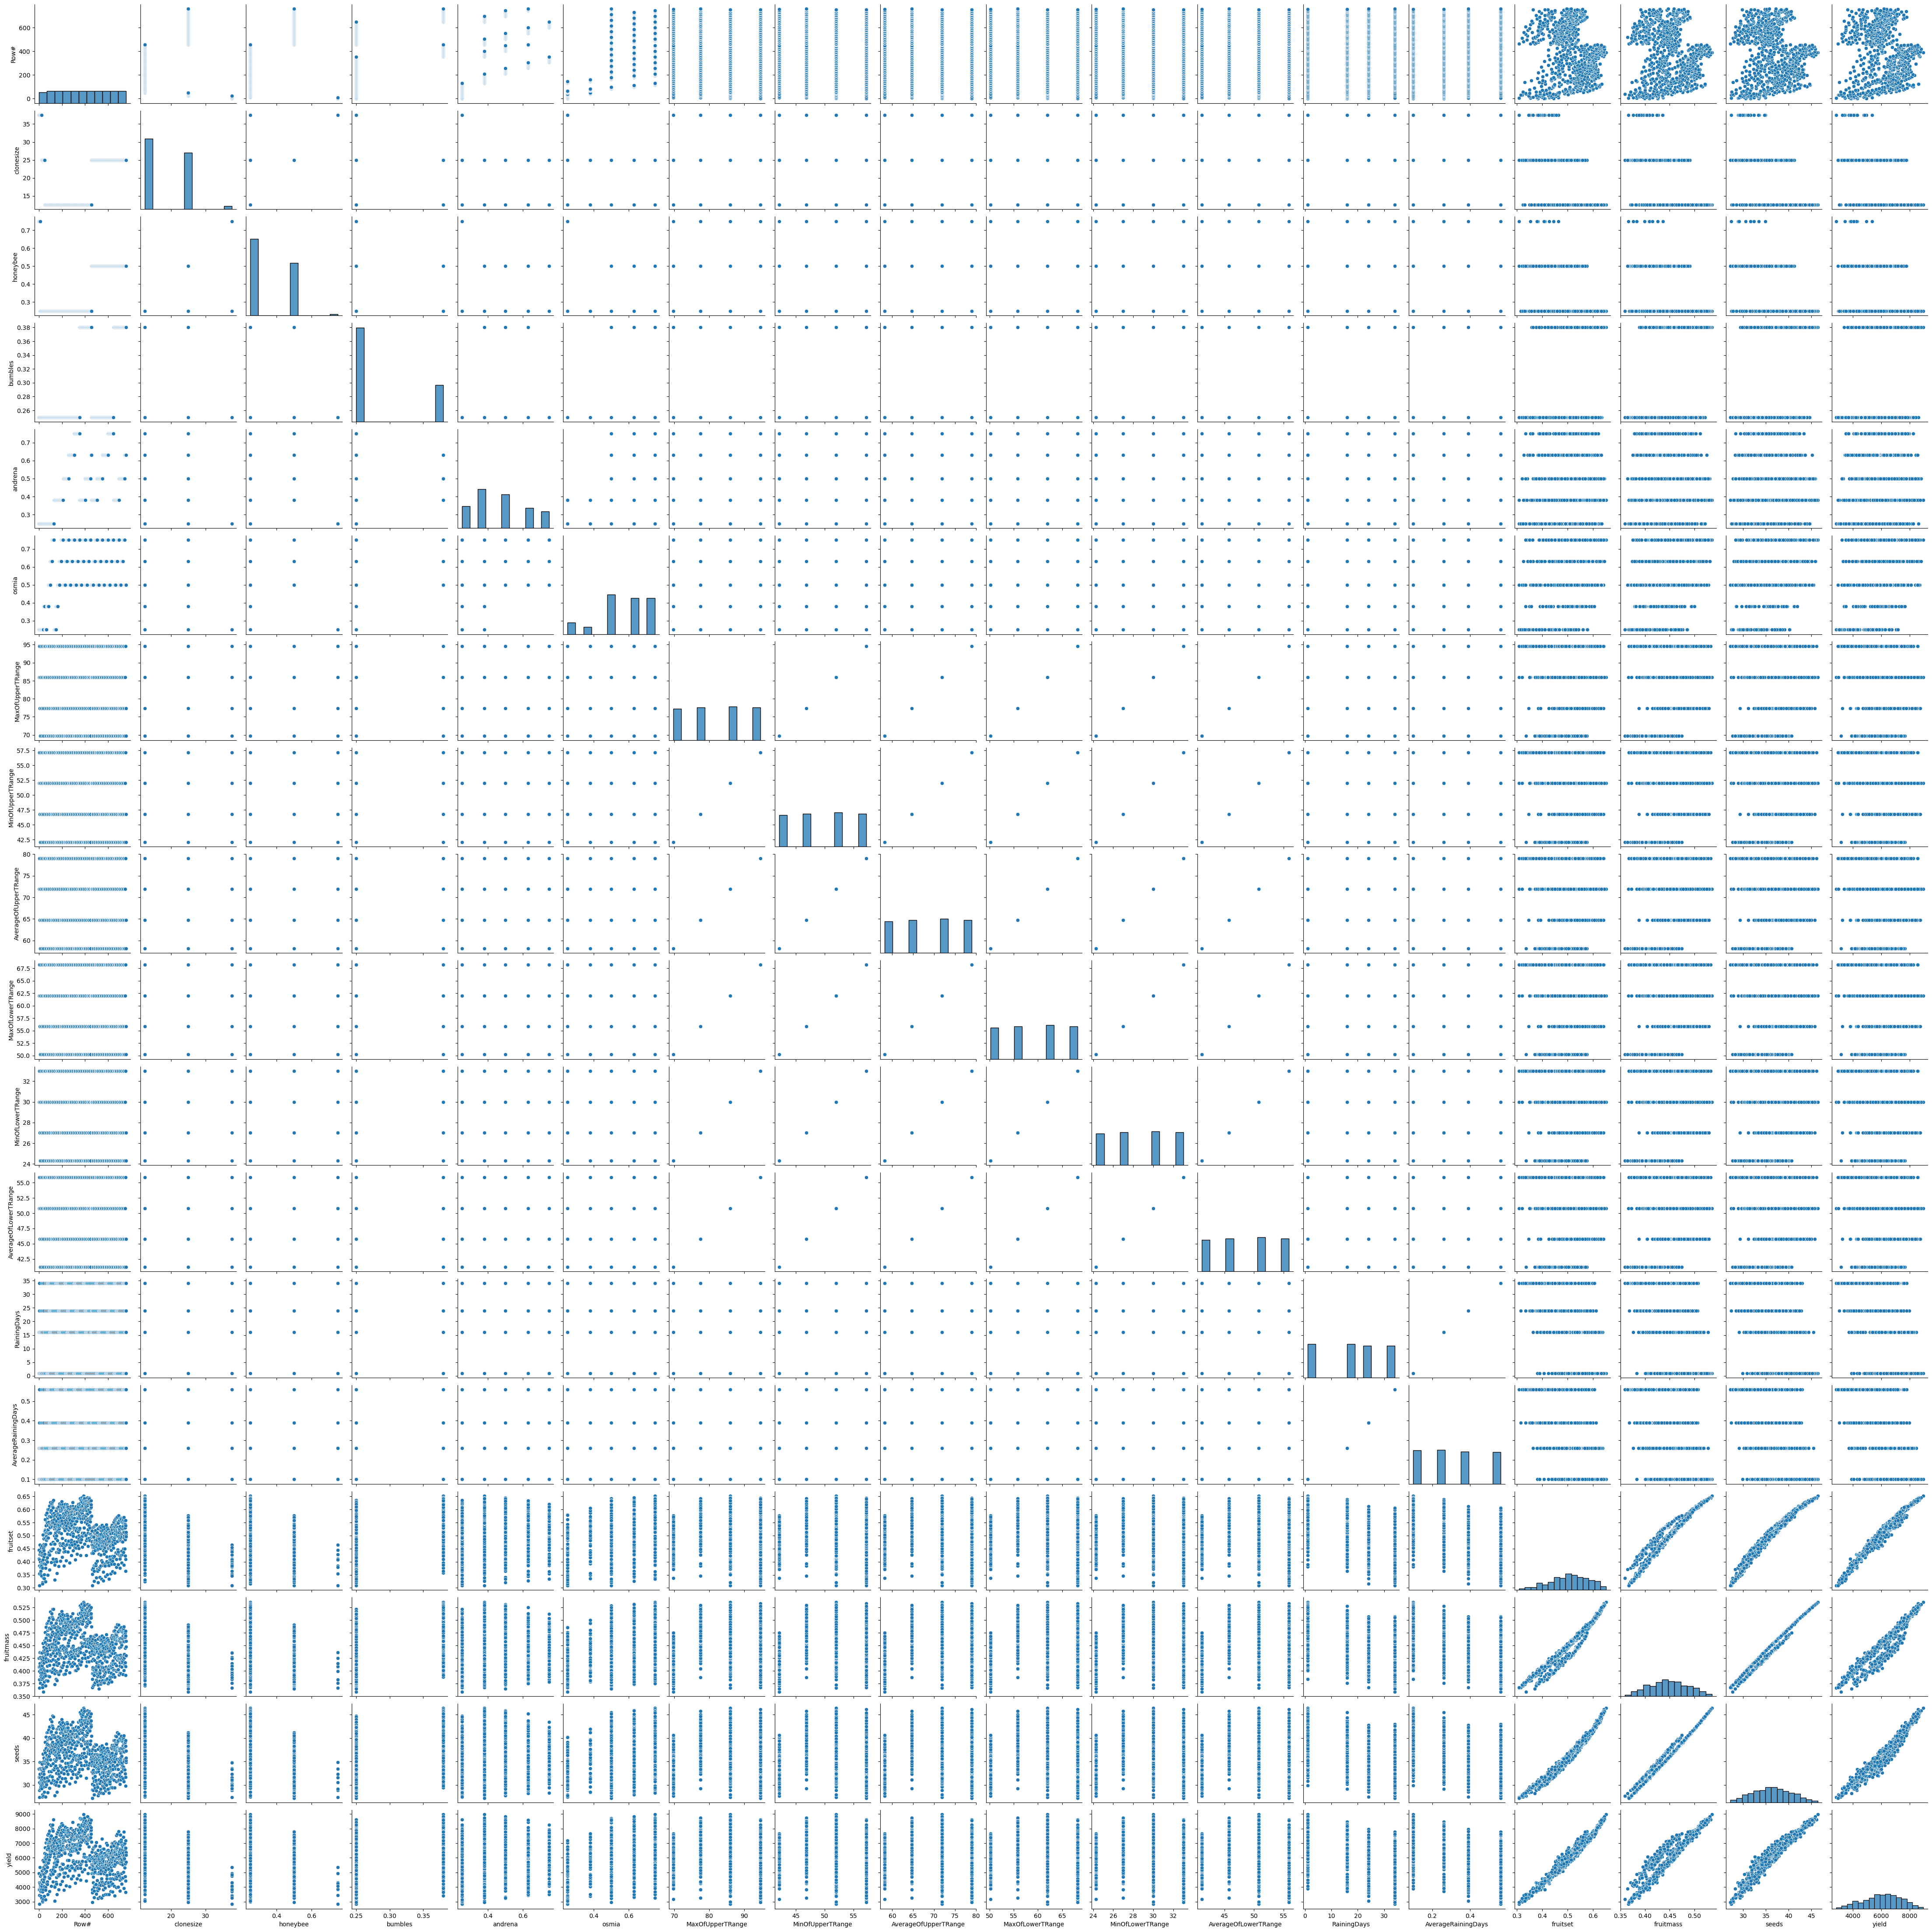

In [20]:
plt.figure(figsize=(15,12))
sns.pairplot(p_d)
plt.show()

#### removing target value from dataset

In [21]:
x=p_d.drop(columns=['yield','Row#'])
y=p_d[['yield']]

### splitting data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Training the models

### Linear Regresion model

In [23]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)


mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
rsq_lr = r2_score(y_test,pred_lr)

print("MAE:%.3f" % mae_lr)
print("MSE:%.3f" % mse_lr)
print("RSME:%.3f" % rmse_lr)
print("R-Square:%.3f" % rsq_lr)
print("training accuracy",lr.score(x_train,y_train))
print("testing accuracy",lr.score(x_test,y_test))


MAE:87.009
MSE:12093.240
RSME:109.969
R-Square:0.993
training accuracy 0.9918401736922372
testing accuracy 0.992515823698853


### RandomForest Model

In [24]:
rf=RandomForestRegressor(max_depth=1)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
pred_rf_train=rf.predict(x_train)

mae_rf_train=mean_absolute_error(y_train,pred_rf_train)
mae_rf = mean_absolute_error(y_test,pred_rf)
mse_rf = mean_squared_error(y_test,pred_rf)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test,pred_rf)

print("MAE_train:%.3f" % mae_rf_train)
print("MAE:%.3f" % mae_rf)
print("MSE:%.3f" % mse_rf)
print("RSME:%.3f" % rmse_rf)
print("R-Square:%.3f" % rsq_rf)
print("training accuracy",rf.score(x_train,y_train))
print("testing accuracy",rf.score(x_test,y_test))

MAE_train:598.746
MAE:596.199
MSE:491642.205
RSME:701.172
R-Square:0.696
training accuracy 0.6922597007723057
testing accuracy 0.6957360469382565


### DecisionTree Model

In [25]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)

mae_dt = mean_absolute_error(y_test,pred_dt)
mse_dt = mean_squared_error(y_test,pred_dt)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test,pred_dt)

print("MAE:%.3f" % mae_dt)
print("MSE:%.3f" % mse_dt)
print("RSME:%.3f" % rmse_dt)
print("R-Sqare:%.3f" % rsq_dt)
print("training accuracy",dt.score(x_train,y_train))
print("testing accuracy",dt.score(x_test,y_test))

MAE:158.698
MSE:41184.071
RSME:202.939
R-Sqare:0.975
training accuracy 1.0
testing accuracy 0.9745123013499445


### XGBoost Model

In [26]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)

mae_xgb = mean_absolute_error(y_test,pred_xgb)
mse_xgb = mean_squared_error(y_test,pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test,pred_xgb)

print("MAE:%.3f" % mae_xgb)
print("MSE:%.3f" % mse_xgb)
print("RSME:%.3f" % rmse_xgb)
print("R-Sqare:%.3f" % rsq_xgb)
print("training accuracy",xgb.score(x_train,y_train))
print("testing accuracy",xgb.score(x_test,y_test))

MAE:107.235
MSE:19564.571
RSME:139.873
R-Sqare:0.988
training accuracy 0.9999402183903177
testing accuracy 0.9878920205537743


### Hyperparameter Tuning 

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [0.1, 1, 10]}  # Example values for regularization strength

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)

best_alpha = ridge_regressor.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Using the best model found by GridSearchCV
best_ridge = ridge_regressor.best_estimator_
best_ridge.fit(x_train, y_train)
pred_ridge = best_ridge.predict(x_test)

# Evaluation metrics
mae_ridge = mean_absolute_error(y_test, pred_ridge)
mse_ridge = mean_squared_error(y_test, pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
rsq_ridge = r2_score(y_test, pred_ridge)

print("MAE: %.3f" % mae_ridge)
print("MSE: %.3f" % mse_ridge)
print("RMSE: %.3f" % rmse_ridge)
print("R-Square: %.3f" % rsq_ridge)
print("Training Accuracy:", best_ridge.score(x_train, y_train))
print("Testing Accuracy:", best_ridge.score(x_test, y_test))


Best Alpha: 0.1
MAE: 95.466
MSE: 14043.502
RMSE: 118.505
R-Square: 0.991
Training Accuracy: 0.991011446378135
Testing Accuracy: 0.9913088598782471


In [40]:
param_grid = {
    'n_estimators': [50, 100, 200],             
    'max_depth': [None, 10, 20, 30],            
    'min_samples_split': [2, 5, 10],             
    'min_samples_leaf': [1, 2, 4],              
    'bootstrap': [True, False]                   
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.3f}")

# Train the model with the best parameters
best_rf = grid_search.best_estimator_
pred_rf_train_tu = best_rf.predict(x_train)
pred_rf_tu = best_rf.predict(x_test)

mae_rf_train_tu = mean_absolute_error(y_train, pred_rf_train_tu)
mae_rf_tu = mean_absolute_error(y_test, pred_rf_tu)
mse_rf_tu = mean_squared_error(y_test, pred_rf_tu)
rmse_rf_tu = np.sqrt(mse_rf_tu)
rsq_rf_tu = r2_score(y_test, pred_rf_tu)

print("MAE_train: %.3f" % mae_rf_train_tu)
print("MAE: %.3f" % mae_rf_tu)
print("MSE: %.3f" % mse_rf_tu)
print("RMSE: %.3f" % rmse_rf_tu)
print("R-Square: %.3f" % rsq_rf_tu)
print("Training Accuracy: %.3f" % best_rf.score(x_train, y_train))
print("Testing Accuracy: %.3f" % best_rf.score(x_test, y_test))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.986
MAE_train: 41.448
MAE: 110.332
MSE: 19188.170
RMSE: 138.521
R-Square: 0.988
Training Accuracy: 0.998
Testing Accuracy: 0.988


In [38]:
dt = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10, 15],     
    'min_samples_leaf': [1, 2, 5, 10],       
    'max_features': ['auto', 'sqrt', 'log2', None]  
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

best_dt = grid_search.best_estimator_
pred_dt_tu = best_dt.predict(x_test)

mae_dt_tu = mean_absolute_error(y_test, pred_dt_tu)
mse_dt_tu = mean_squared_error(y_test, pred_dt_tu)
rmse_dt_tu = np.sqrt(mse_dt_tu)
rsq_dt_tu = r2_score(y_test, pred_dt_tu)

print("MAE:", mae_dt_tu)
print("MSE:", mse_dt_tu)
print("RMSE:", rmse_dt_tu)
print("R-Squared:", rsq_dt_tu)
print("Training Accuracy:", best_dt.score(x_train, y_train))
print("Testing Accuracy:", best_dt.score(x_test, y_test))


Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best CV Score: -40740.29928310072
MAE: 128.17739583664462
MSE: 30284.679955869266
RMSE: 174.02494061446845
R-Squared: 0.9812576374711801
Training Accuracy: 0.9931849259250838
Testing Accuracy: 0.9812576374711801


In [36]:
xgb = XGBRegressor()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7],             
    'min_child_weight': [1, 3, 5],      
    'subsample': [0.6, 0.8, 1.0],       
    'colsample_bytree': [0.6, 0.8, 1.0]  
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

best_xgb = grid_search.best_estimator_

pred_xgb_tuned = best_xgb.predict(x_test)

mae_xgb_tuned = mean_absolute_error(y_test, pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test, pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)
rsq_xgb_tuned = r2_score(y_test, pred_xgb_tuned)

print("\nTuned Model Metrics:")
print("MAE: %.3f" % mae_xgb_tuned)
print("MSE: %.3f" % mse_xgb_tuned)
print("RMSE: %.3f" % rmse_xgb_tuned)
print("R-Squared: %.3f" % rsq_xgb_tuned)
print("Training Accuracy:", best_xgb.score(x_train, y_train))
print("Testing Accuracy:", best_xgb.score(x_test, y_test))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}
Best CV Score: -16626.085239377753

Tuned Model Metrics:
MAE: 94.131
MSE: 14517.358
RMSE: 120.488
R-Squared: 0.991
Training Accuracy: 0.9951537856788809
Testing Accuracy: 0.9910156029061967


## Testing the Model

In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print(lr.predict([[37.5,0.75,0.25,0.25,0.25,86,52,71.9,62,30,50.8,16,0.26,0.410652063,0.408159008,31.67889844]]))

[[4353.34667969]]


In [28]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print(lr.predict([[25,0.25,0.25,0.25,0.25,94.6,57.2,79,68.2,33,55.9,1,0.2,0.425,0.417,32.460]]))

[[4436.09667969]]


In [29]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print(lr.predict([[25,18.43,0,0,0,86,52,71.9,62	,30	,50.8,3.77,0.06,0.559628479,0.364936839,27.10639138]]))

[[13291.59667969]]


In [30]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)

print(xgb.predict([[37.5,0.75,0.25,0.25,0.25,86,52,71.9,62,30,50.8,16,0.26,0.410652063,0.408159008,31.67889844]]))

[3823.4697]


In [48]:
best_xgb = XGBRegressor()
best_xgb.fit(x_train,y_train)
pred_xgb1=best_xgb.predict(x_test)

print(best_xgb.predict([[37.5,0.75,0.25,0.25,0.25,86,52,71.9,62,30,50.8,16,0.26,0.41,0.40,31.67]]))

[3886.5415]


In [31]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)

print(xgb.predict([[25,18.43,0,0,0,86,52,71.9,62,30	,50.8,3.77,0.06,0.55,0.36,27.1]]))

[6536.0083]


In [41]:
best_xgb = XGBRegressor()
best_xgb.fit(x_train,y_train)
pred_xgb_b=best_xgb.predict(x_test)

print(best_xgb.predict([[25,18.43,0,0,0,86,52,71.9,62,30,50.8,3.77,0.06,0.55,0.36,27.1]]))

[6536.0083]


In [32]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)

print(xgb.predict([[25,0.25,0.25,0.25,0.25,94.6,57.2,79,68.2,33,55.9,1,0.2,0.425,0.417,32.460]]))

[4480.245]


In [33]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)

print(xgb.predict([[25,5,0.25,0.25,0.50,94.6,57.2,79,68.2,33,55.9,1,0.2,0.425,0.417,32.460]]))

[4618.556]


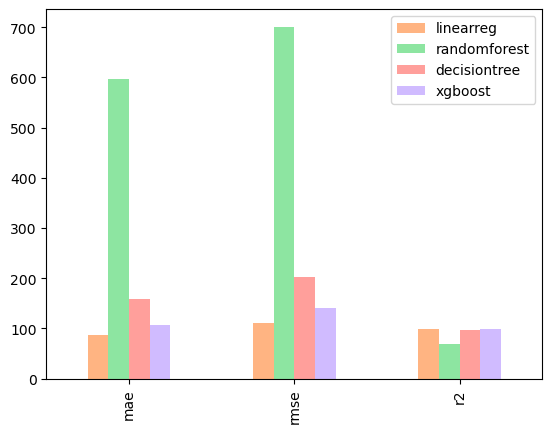

In [34]:
error_rec={
    'linearreg':{
        "mae":mae_lr,
        "rmse":rmse_lr,
        "r2":rsq_lr*100
    },
    'randomforest':{
        "mae":mae_rf,
        "rmse":rmse_rf,
        "r2":rsq_rf*100
    },
    'decisiontree':{
        "mae":mae_dt,
        "rmse":rmse_dt,
        "r2":rsq_dt*100
    },
    'xgboost':{
        "mae":mae_xgb,
        "rmse":rmse_xgb,
        "r2":rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar",
                             color=[
                                 sns.color_palette("pastel")[1],
                                 sns.color_palette("pastel")[2],
                                 sns.color_palette("pastel")[3],
                                 sns.color_palette("pastel")[4]]);

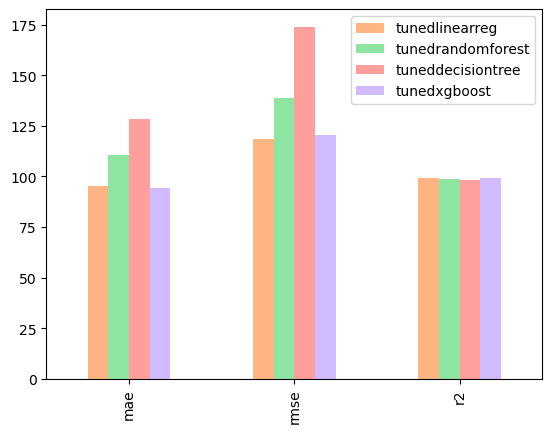

In [46]:
error_rec={
    'tunedlinearreg':{
        "mae":mae_ridge,
        "rmse":rmse_ridge,
        "r2":rsq_ridge*100
    },
    'tunedrandomforest':{
        "mae":mae_rf_tu,
        "rmse":rmse_rf_tu,
        "r2":rsq_rf_tu*100
    },
    'tuneddecisiontree':{
        "mae":mae_dt_tu,
        "rmse":rmse_dt_tu,
        "r2":rsq_dt_tu*100
    },
    'tunedxgboost':{
        "mae":mae_xgb_tuned,
        "rmse":rmse_xgb_tuned,
        "r2":rsq_xgb_tuned*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar",
                             color=[
                                 sns.color_palette("pastel")[1],
                                 sns.color_palette("pastel")[2],
                                 sns.color_palette("pastel")[3],
                                 sns.color_palette("pastel")[4]]);

#### As we can see in the above bar chart R-square value for XGBoost is higher than other algorithms that had used. So we will be going with xgboost for model building.

In [47]:
import pickle
pickle.dump(best_xgb,open('bbyp.pkl','wb'))